In [1]:
from time import perf_counter
import sys, os
sys.path.insert(0, os.path.abspath('..'))
import warnings
warnings.filterwarnings('ignore')

from preprocess import prepare_dataset
from validation.models import RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV
from validation import set_baseline, get_best_models, plot_train_val, find_winner

X_train, X_val, y_train, y_val = prepare_dataset(kind='cv')

In [2]:
baseline = set_baseline(X_train, X_val, y_train, y_val)

Baseline loss: 2159445.526444445
Baseline score: 0.4124612701450111


In [3]:
models = [RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV]
results = get_best_models(models, X_train, X_val, y_train, y_val)

Start training Ridge with {'alpha': 0.1}
Start training Ridge with {'alpha': 0.5}
Start training Ridge with {'alpha': 1.0}
Start training Ridge with {'alpha': 10.0}
Start training Ridge with {'alpha': 20.0}
Start training Lasso with {'alpha': 0.1}
Start training Lasso with {'alpha': 0.5}
Start training Lasso with {'alpha': 1.0}
Start training Lasso with {'alpha': 10.0}
Start training Lasso with {'alpha': 20.0}
Start training KNN with {'n_neighbors': 5}
Start training KNN with {'n_neighbors': 6}
Start training KNN with {'n_neighbors': 7}
Start training KNN with {'n_neighbors': 8}
Start training KNN with {'n_neighbors': 9}
Start training KNN with {'n_neighbors': 10}
Start training SVR with {'gamma': 0.001, 'C': 0.001}
Start training SVR with {'gamma': 0.001, 'C': 0.01}
Start training SVR with {'gamma': 0.001, 'C': 0.1}
Start training SVR with {'gamma': 0.001, 'C': 1.0}
Start training SVR with {'gamma': 0.001, 'C': 10.0}
Start training SVR with {'gamma': 0.001, 'C': 100.0}
Start training 

AttributeError: 'ExtraTreesRegressor' object has no attribute 'best_model'

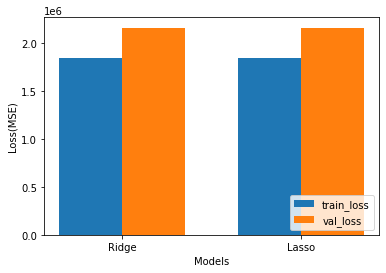

In [ ]:
plot_train_val(results, type='loss', label='Loss(MSE)')

In [ ]:
X_train, X_test, y_train, y_test = prepare_dataset(kind='train')

/home/yoojin/miniconda3/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/yoojin/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/yoojin/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

TypeError: list indices must be integers or slices, not str

In [ ]:
winner_model = sorted(results, key=lambda x: x['val_score'], reverse=True)[0]['best_model']
winner_model.fit(X_train, y_train)
print(winner_model.score(X_test, y_test))

0.5803249555094327
